In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Clean

- 1.1 Compound name should be removed. 
- 1.2 In literature is target (label).
- 1.3 Missing value in v(A), v(B), Lowest distortion. The compound missed v(A)and also missed v(B) 35.3%.
- 1.4 t missed 3143 data, too many, should be removed.


**Ways to handle missing data**

- Replace all undefined values with zeroes. This is bound to be incorrect for a large number of compounds.
- Replace all undefined values with the median value. Makes no sense since valencies should be integers.
- Drop the entire columns: This would remove useful data from the dataset.
- Drop the entire rows where the valency is missing: We'd end up losing 35% of the data, which is a great loss.
- **Treat the "Undefined" as a value: We could one-hot encode the valencies and the undefined values will still be represented within the data.** (use this one for v(A), v(B), Lowest distortion)

In [2]:
df=pd.read_csv(r'./Crystal_structure.csv')

In [3]:
df.round(decimals=2).head()

,Compound,A,B,Perovskite,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.00,-3.25,0.71,-,0.80,cubic
1,AcAgO3,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.49,-2.57,0.76,-,0.68,orthorhombic
2,AcAlO3,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.89,-1.85,0.92,-,0.39,cubic
3,AcAsO3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.93,-1.58,0.93,-,0.37,orthorhombic
4,AcAuO3,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.31,-2.28,0.76,-,0.66,orthorhombic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Compound           5329 non-null   object 
 1   A                  5329 non-null   object 
 2   B                  5329 non-null   object 
 3   Perovskite         5329 non-null   bool   
 4   v(A)               5329 non-null   object 
 5   v(B)               5329 non-null   object 
 6   r(AXII)(Å)         5329 non-null   float64
 7   r(AVI)(Å)          5329 non-null   float64
 8   r(BVI)(Å)          5329 non-null   float64
 9   EN(A)              5329 non-null   float64
 10  EN(B)              5329 non-null   float64
 11  l(A-O)(Å)          5329 non-null   float64
 12  l(B-O)(Å)          5329 non-null   float64
 13  ΔENR               5329 non-null   float64
 14  tG                 5329 non-null   float64
 15  τ                  5329 non-null   object 
 16  μ                  5329 

In [5]:
df.isnull().sum()  #No missing value

Compound             0
A                    0
B                    0
Perovskite           0
v(A)                 0
v(B)                 0
r(AXII)(Å)           0
r(AVI)(Å)            0
r(BVI)(Å)            0
EN(A)                0
EN(B)                0
l(A-O)(Å)            0
l(B-O)(Å)            0
ΔENR                 0
tG                   0
τ                    0
μ                    0
Lowest distortion    0
dtype: int64

In [6]:
dic={'dtype':[], 'num_uni':[],'uni_value':[],'uni_value_counts':[]}
for i in df.columns:
    dtype=df[i].dtype
    num_uni=df[i].nunique()
    uni_value=df[i].unique()
    uni_value_counts=df[i].value_counts(sort=False).to_dict().values()
    dic['dtype'].append(dtype)
    dic['num_uni'].append(num_uni)
    dic['uni_value'].append(uni_value)
    dic['uni_value_counts'].append(uni_value_counts)
pd.DataFrame(dic,index=df.columns)

,dtype,num_uni,uni_value,uni_value_counts
Compound,object,5329,"[Ac2O3, AcAgO3, AcAlO3, AcAsO3, AcAuO3, AcBO3,...","(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
A,object,73,"[Ac, Ag, Al, As, Au, B, Ba, Be, Bi, Ca, Cd, Ce...","(73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 7..."
B,object,73,"[Ac, Ag, Al, As, Au, B, Ba, Be, Bi, Ca, Cd, Ce...","(73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 7..."
Perovskite,bool,2,"[False, True]","(5107, 222)"
v(A),object,7,"[0, -, 1, 3, 2, 4, 5]","(1233, 1881, 222, 935, 884, 146, 28)"
v(B),object,7,"[0, -, 5, 3, 4, 2, 1]","(1233, 1881, 222, 935, 884, 146, 28)"
r(AXII)(Å),float64,75,"[1.12, 1.28, 0.75, 0.54, 0.52, 0.58, 0.93, 0.2...","(171, 72, 23, 74, 23, 63, 73, 73, 73, 73, 73, ..."
r(AVI)(Å),float64,51,"[1.12, 0.95, 0.54, 0.52, 0.93, 0.27, 1.35, 0.4...","(73, 219, 73, 73, 73, 73, 73, 73, 219, 73, 219..."
r(BVI)(Å),float64,68,"[1.12, 0.95, 0.54, 0.52, 0.93, 0.27, 1.35, 0.4...","(73, 190, 114, 28, 73, 73, 73, 73, 183, 73, 17..."
EN(A),float64,56,"[1.1, 1.93, 1.61, 2.18, 2.54, 2.04, 0.89, 1.57...","(219, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, ..."


In [7]:
(df=='-').any()

Compound             False
A                    False
B                    False
Perovskite           False
v(A)                  True
v(B)                  True
r(AXII)(Å)           False
r(AVI)(Å)            False
r(BVI)(Å)            False
EN(A)                False
EN(B)                False
l(A-O)(Å)            False
l(B-O)(Å)            False
ΔENR                 False
tG                   False
τ                     True
μ                    False
Lowest distortion     True
dtype: bool

In [8]:
print(df[df['v(A)']=='-']['v(A)'].size)
print(df[df['v(B)']=='-']['v(B)'].size)
df[df['v(A)']=='-']['v(B)'] # 

1881
1881


74      -
75      -
79      -
80      -
82      -
       ..
5321    -
5325    -
5326    -
5327    -
5328    -
Name: v(B), Length: 1881, dtype: object

In [9]:
df[df['Lowest distortion']=='-']['Perovskite'].value_counts()

Perovskite
False    53
Name: count, dtype: int64

In [10]:
df.replace('-', 'missing value', inplace=True)  #replace - with 'missing value'
df.drop('Compound',axis=1, inplace=True) # remove Compund
df.drop('τ',axis=1, inplace=True)

In [11]:
element={'Ac':89, 'Ag':47, 'Al':13, 'As':33, 'Au':79, 'B':5, 'Ba':56, 'Be':4, 'Bi':83, 'Ca':20, 'Cd':48,
       'Ce':58, 'Co':27, 'Cr':24, 'Cs':55, 'Cu':29, 'Dy':66, 'Er':68, 'Eu':63, 'Fe':26, 'Ga':31, 'Gd':64,
       'Ge':32, 'Hf':72, 'Hg':80, 'Ho':67, 'In':49, 'Ir':77, 'K':19, 'La':57, 'Li':3, 'Lu':71, 'Mg':12,
       'Mn':25, 'Mo':42, 'Na':11, 'Nb':41, 'Nd':60, 'Ni':28, 'Np':93, 'Os':76, 'Pa':91, 'Pb':82, 'Pd':46,
       'Pm':61, 'Pr':59, 'Pt':78, 'Pu':94, 'Rb':37, 'Re':75, 'Rh':45, 'Ru':44, 'Sb':51, 'Sc':21, 'Si':14,
       'Sm':62, 'Sn':50, 'Sr':38, 'Ta':73, 'Tb':65, 'Tc':43, 'Te':52, 'Th':90, 'Ti':22, 'Tl':81, 'Tm':69,
       'U':92, 'V':23, 'W':74, 'Y':39, 'Yb':70, 'Zn':30, 'Zr':40}

In [12]:
df['A_atomicN']=df['A'].map(lambda x: element[x] if x in element.keys() else x)
df['B_atomicN']=df['B'].map(lambda x: element[x] if x in element.keys() else x)

In [13]:
element.keys()

dict_keys(['Ac', 'Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Ca', 'Cd', 'Ce', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'Fe', 'Ga', 'Gd', 'Ge', 'Hf', 'Hg', 'Ho', 'In', 'Ir', 'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'Na', 'Nb', 'Nd', 'Ni', 'Np', 'Os', 'Pa', 'Pb', 'Pd', 'Pm', 'Pr', 'Pt', 'Pu', 'Rb', 'Re', 'Rh', 'Ru', 'Sb', 'Sc', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Tc', 'Te', 'Th', 'Ti', 'Tl', 'Tm', 'U', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr'])

In [14]:
for i in element.keys():
    for j in element.keys():
        if i!=j and element[i]-element[j]==0:
            print(i)
            print(j)
        else:
            continue      

In [15]:
df.head()

,A,B,Perovskite,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ,Lowest distortion,A_atomicN,B_atomicN
0,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,0.800000,cubic,89,89
1,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,0.678571,orthorhombic,89,47
2,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,0.385714,cubic,89,13
3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,0.371429,orthorhombic,89,33
4,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,0.664286,orthorhombic,89,79


# 2. Exploary Data Analysis (EDA)

# 2.1 Data Visulaization

In [16]:
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"xtick.labelsize": 12})
plt.rcParams.update({"ytick.labelsize": 12})
plt.rcParams.update({"xtick.major.size": 12})
plt.rcParams.update({"ytick.major.size": 12})
plt.rcParams.update({"xtick.bottom": True})
plt.rcParams.update({"ytick.left": True})
plt.rcParams.update({"xtick.top": False})
plt.rcParams.update({"ytick.right": False})

In [17]:
df.head()

,A,B,Perovskite,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ,Lowest distortion,A_atomicN,B_atomicN
0,Ac,Ac,False,0,0,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,0.800000,cubic,89,89
1,Ac,Ag,False,0,0,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,0.678571,orthorhombic,89,47
2,Ac,Al,False,0,0,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,0.385714,cubic,89,13
3,Ac,As,False,0,0,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,0.371429,orthorhombic,89,33
4,Ac,Au,False,0,0,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,0.664286,orthorhombic,89,79


In [18]:
cat=['Perovskite','v(A)', 'v(B)', 'Lowest distortion']
num=['A_atomicN', 'B_atomicN','r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)','ΔENR', 'tG', 'μ']

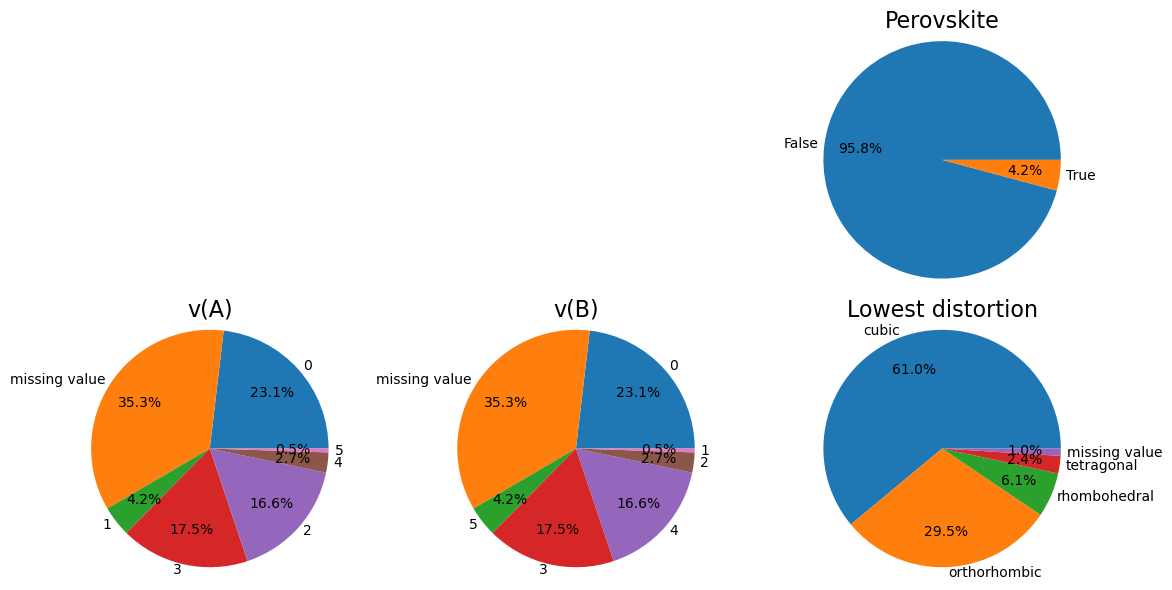

In [76]:
fig=plt.figure(figsize=(12,6))

for i in range(len(cat)):
    plt.subplot(2, 3, i+3)
    count=df[cat[i]].value_counts(sort=False)
    label=df[cat[i]].unique()
    total=len(df.index)
    def pct(x):
        return '{:.1f}%'.format(x)
        #return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

    plt.pie(count,labels=label,autopct=pct,labeldistance=1.05,radius=1.2, textprops={'fontsize': 10}, pctdistance=0.7)
    plt.title(cat[i],y=1, fontsize=16)

plt.tight_layout()    
plt.savefig('pie.tiff',dpi=300)

<Figure size 800x800 with 0 Axes>

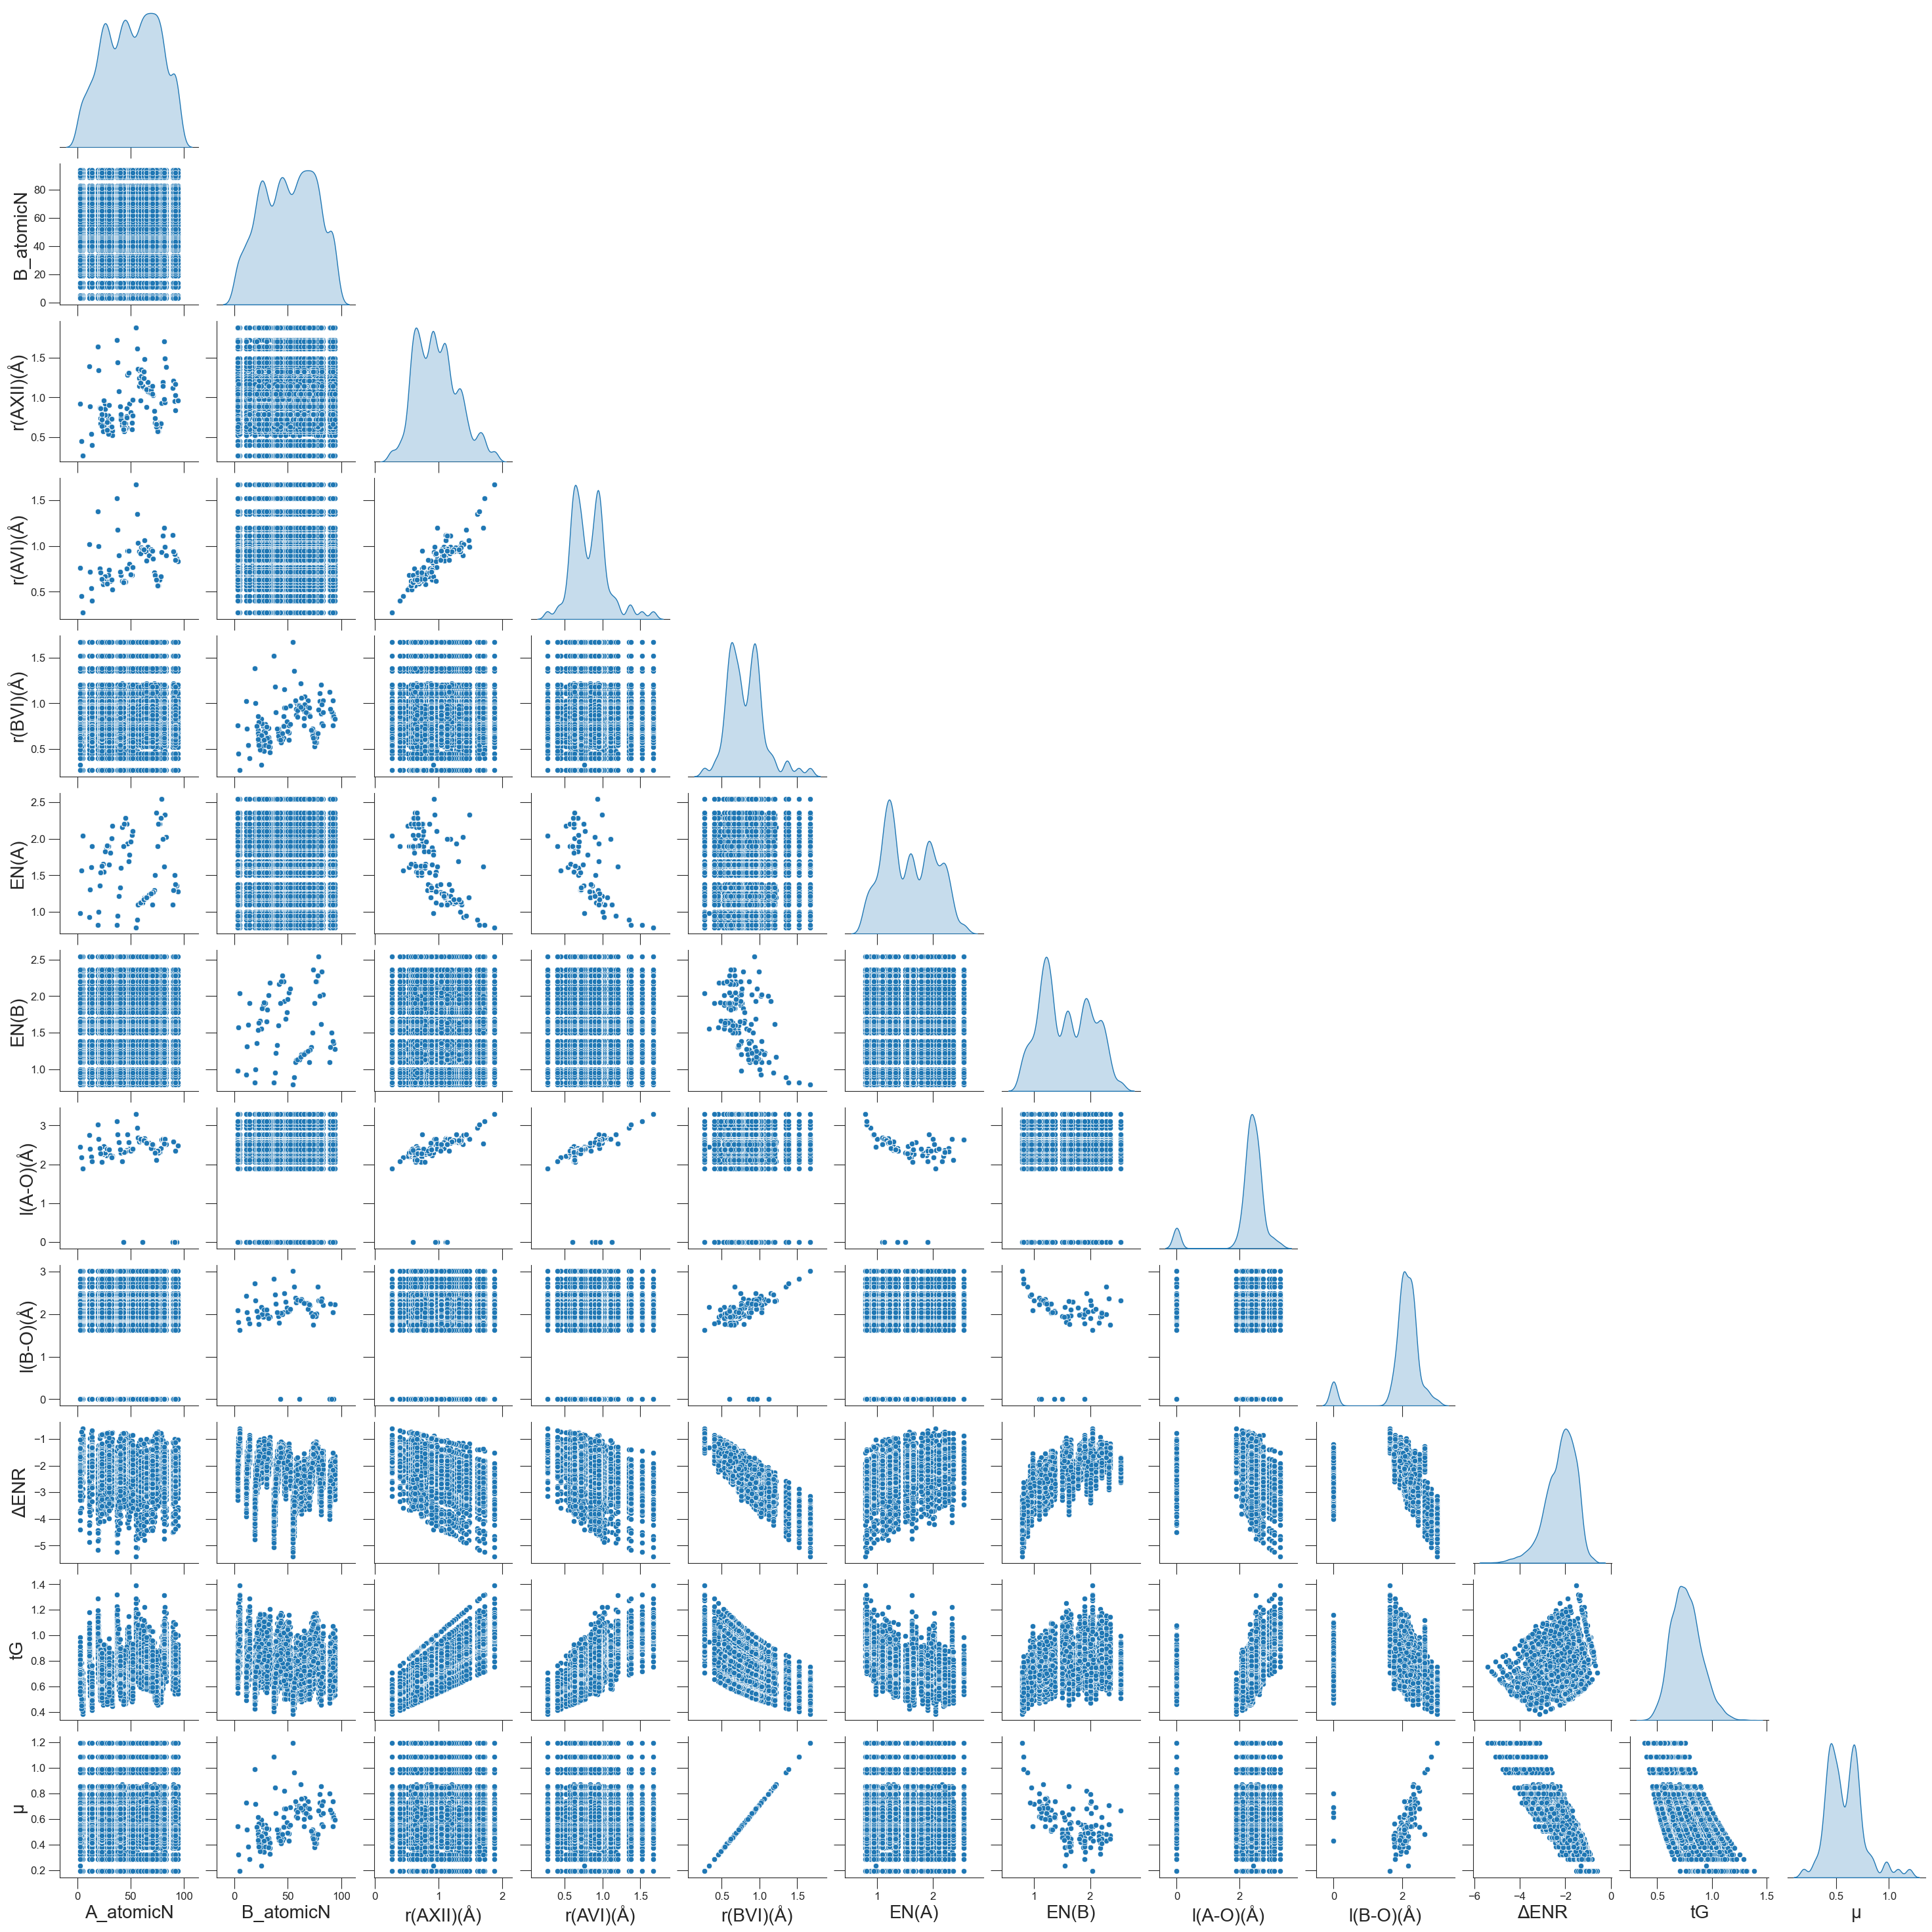

In [79]:
fig=plt.figure(figsize=(8,8))
ax=sns.pairplot(df[num],corner=True,diag_kind='kde')
ax=sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.xticks(fontsize=16) 
plt.yticks(fontsize=16) 
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 20
plt.savefig('pairplot.tiff',dpi=300)
plt.show()

C:\Users\JingyunYe\AppData\Local\Temp\ipykernel_67284\36536275.py:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('heat.tiff',bbox_to_inches='tight')


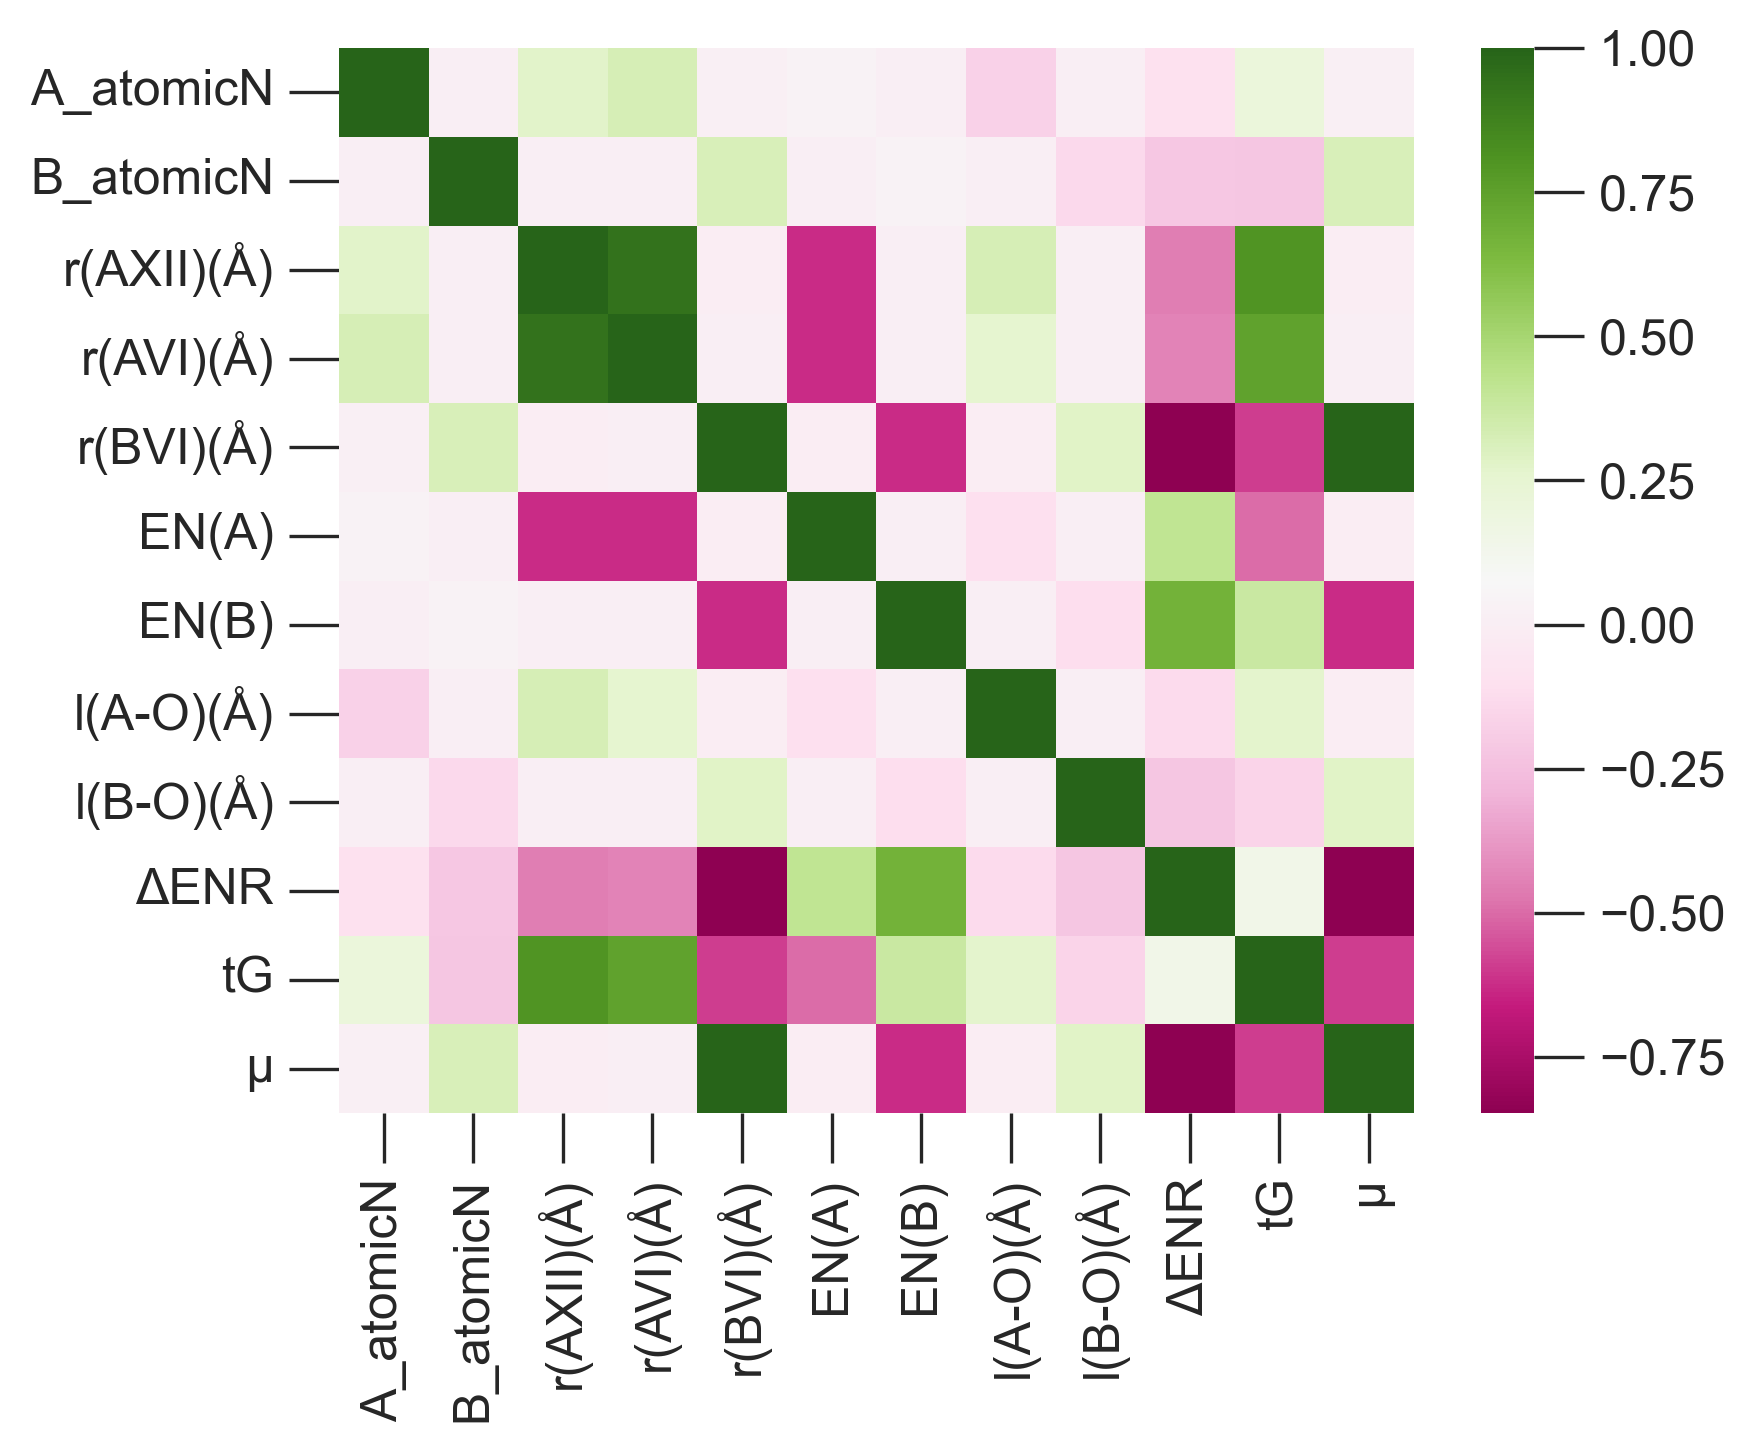

In [80]:
df_corr = df[num].corr(method = 'pearson')

fig=plt.figure(figsize=(6,5),dpi=300)
ax=sns.heatmap(df_corr,cmap='PiYG')
ax.tick_params(left=True, bottom=True)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.tight_layout()
plt.savefig('heat.tiff',bbox_to_inches='tight')
plt.show()

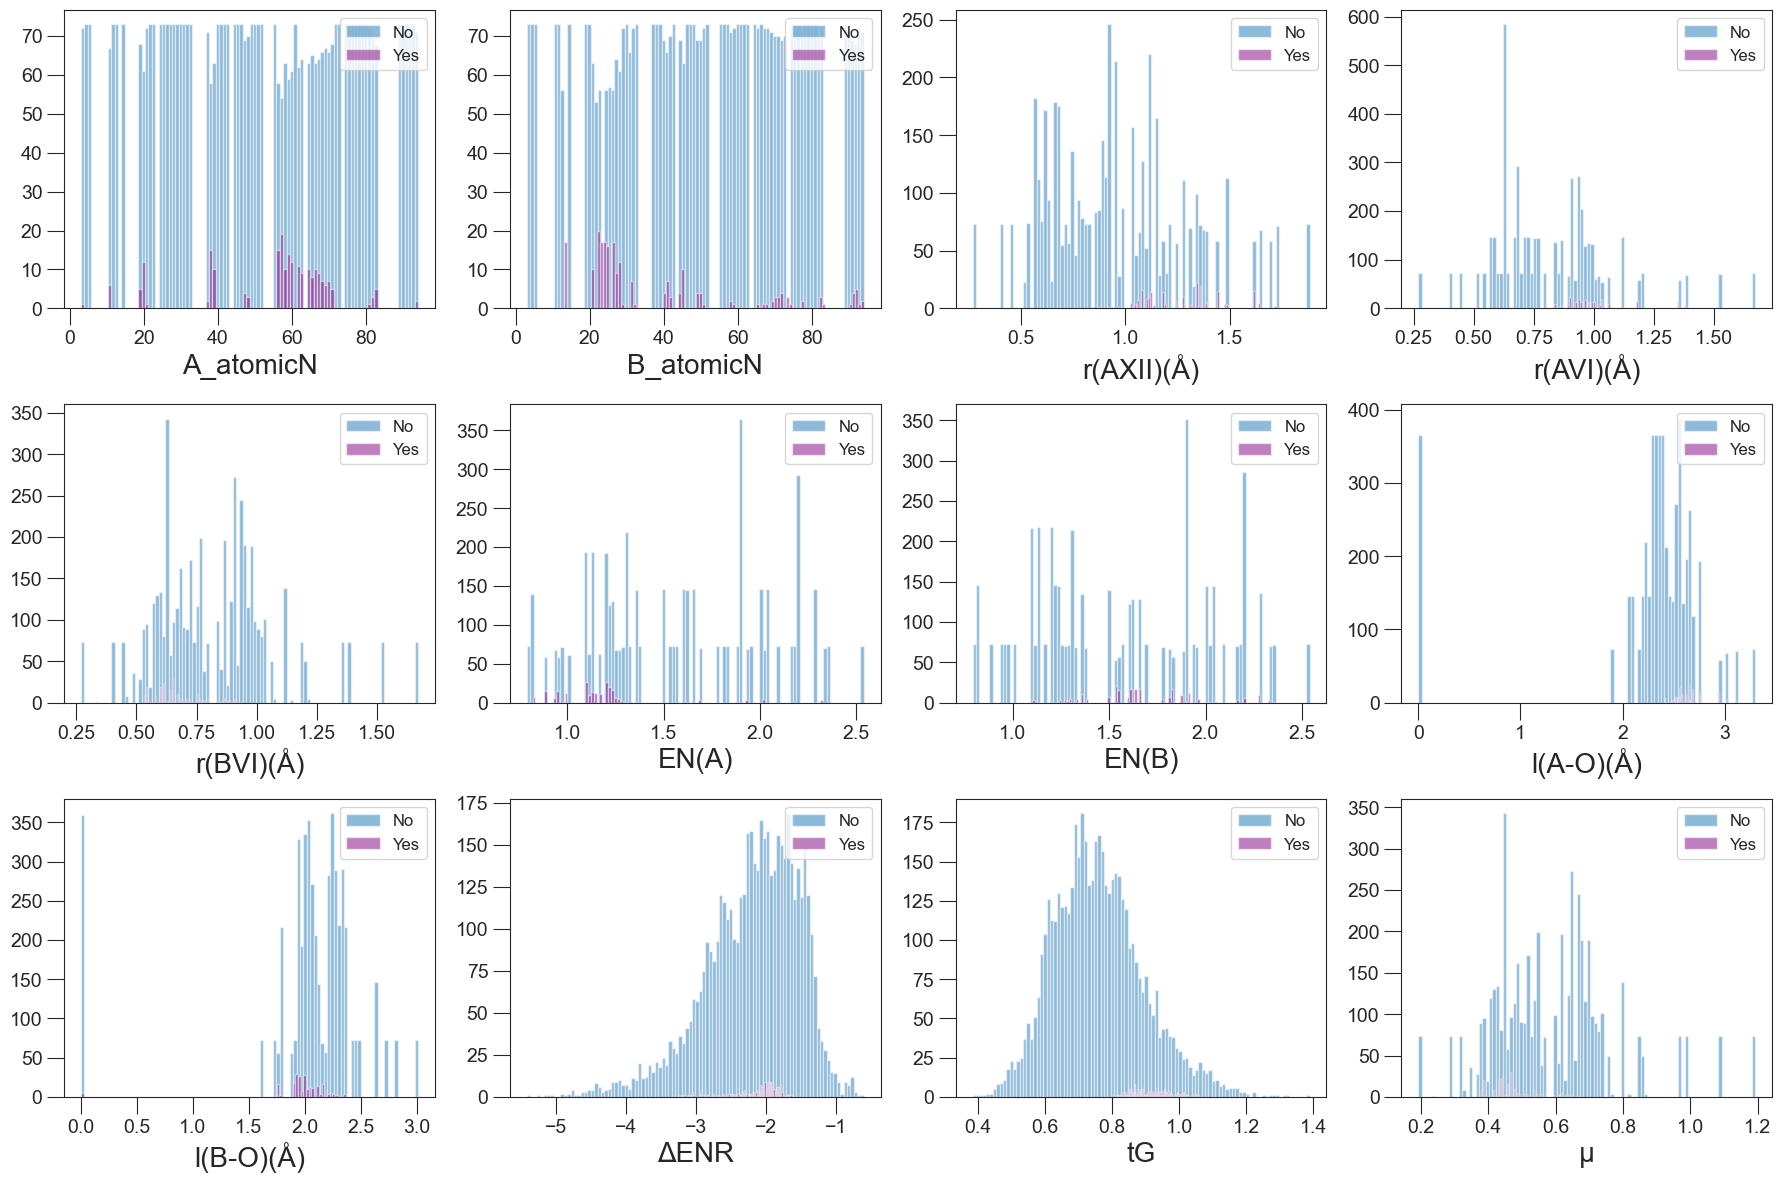

In [97]:
bar=['A_atomicN', 'B_atomicN','r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 
     'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)','ΔENR', 'tG', 'μ']

fig=plt.figure(figsize=(18, 12))

for i in range(len(bar)):
    plt.subplot(3, 4, i+1)
    plt.hist(x=df[df['Perovskite']==False][bar[i]],bins=100, alpha=0.5)
    plt.hist(x=df[df['Perovskite']==True][bar[i]],bins=100, alpha=0.5,color='purple')
    plt.xlabel(bar[i])
    plt.legend(['No', 'Yes'],loc='upper right')
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
plt.tight_layout()    
plt.savefig('bar.tiff')
plt.show()

In [101]:
P=df.groupby(['v(A)'])['Perovskite'].value_counts().to_frame()
P.reset_index(inplace=True)
P

,v(A),Perovskite,count
0,0,False,1224
1,0,True,9
2,1,False,208
3,1,True,14
4,2,False,815
5,2,True,69
6,3,False,808
7,3,True,127
8,4,False,146
9,5,False,28


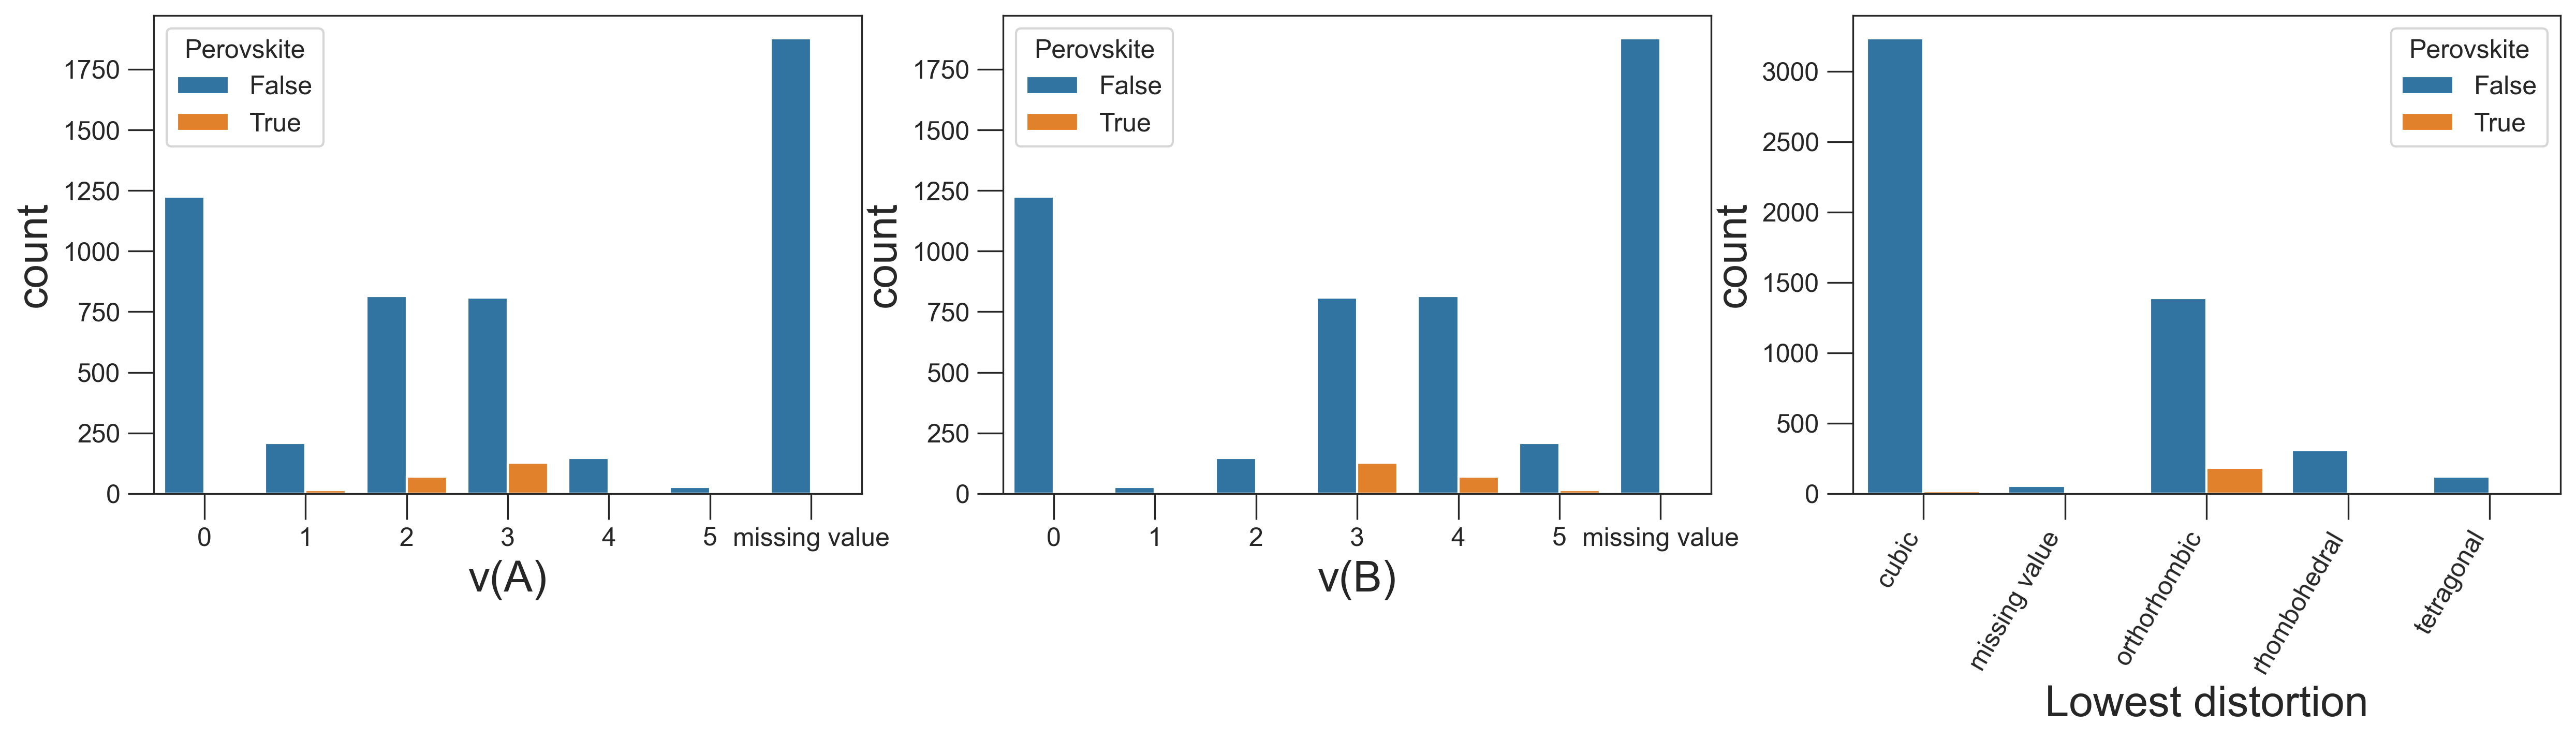

In [114]:
fig=plt.figure(figsize=(20,4),dpi=300)

plt.subplot(1,3,1)
P=df.groupby(['v(A)'])['Perovskite'].value_counts().to_frame()
P.reset_index(inplace=True)
sns.barplot(x='v(A)', y='count', data=P, hue='Perovskite')

plt.subplot(1,3,2)
P=df.groupby(['v(B)'])['Perovskite'].value_counts().to_frame()
P.reset_index(inplace=True)
sns.barplot(x='v(B)', y='count', data=P, hue='Perovskite')

plt.subplot(1,3,3)
P=df.groupby(['Lowest distortion'])['Perovskite'].value_counts().to_frame()
P.reset_index(inplace=True)
sns.barplot(x='Lowest distortion', y='count', data=P, hue='Perovskite')
plt.xticks(rotation=60,horizontalalignment='right')

plt.show()

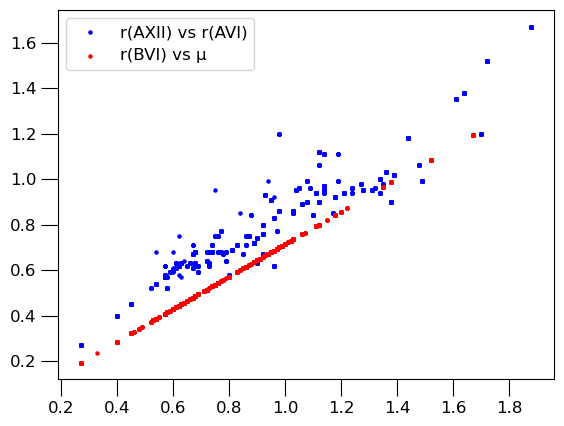

In [21]:
plt.scatter(df['r(AXII)(Å)'],df['r(AVI)(Å)'],marker='o',s=5,color='b')
plt.scatter(df['r(BVI)(Å)'],df['μ'],marker='o',s=5, color='r')
plt.legend(['r(AXII) vs r(AVI)', 'r(BVI) vs μ'],loc='upper left')
 
   #  'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)','ΔENR', 'tG', 
#plt.xlim(0,8700)
#plt.ylim(0,8700)
#plt.plot([0,8700], [0,8700],color='r',linewidth=1)

# 3. Feature Engineering

# New feature

1.24. 6361 phone service (3390 singleline, 2971 Multipline) vs 682 no phone service.

1.25. 682 only has Internet service.

1.26. 4835 has both phone and internet service. 

1.27. 2629 has phone, multipleline, and internet service.

1866 customers has either phone service(1184) or internet(682). Customer has No phone service, don't have mutlipleline, but must have internetservice (682) 
1.25  Customer has phone service, don't have multipleline, don't have internetservice. ()

In [5]:
class Transformer():
    def fit(self, X, y=None):
        pass
        
    def transform(self, X, y=None):
        df=pd.DataFrame()
        df=X 
        df.drop(['Compound', 'τ'],axis=1, inplace=True)
        df['A_atomicN']=df['A'].map(self.Element2AtomicN)
        df['B_atomicN']=df['B'].map(self.Element2AtomicN)
        df['Perovskite']=df['Perovskite'].map(self.Target)
        df.drop(['A', 'B'],axis=1,inplace=True)
        return df

    def fit_transform(self, X, y=None):
        return self.transform(X)
        
    
    def Element2AtomicN(self, x):
        element={'Ac':89, 'Ag':47, 'Al':13, 'As':33, 'Au':79, 'B':5, 'Ba':56, 'Be':4, 'Bi':83, 'Ca':20, 'Cd':48,
       'Ce':58, 'Co':27, 'Cr':24, 'Cs':55, 'Cu':29, 'Dy':66, 'Er':68, 'Eu':63, 'Fe':26, 'Ga':31, 'Gd':64,
       'Ge':32, 'Hf':72, 'Hg':80, 'Ho':67, 'In':49, 'Ir':77, 'K':19, 'La':57, 'Li':3, 'Lu':71, 'Mg':12,
       'Mn':25, 'Mo':42, 'Na':11, 'Nb':41, 'Nd':60, 'Ni':28, 'Np':93, 'Os':76, 'Pa':91, 'Pb':82, 'Pd':46,
       'Pm':61, 'Pr':59, 'Pt':78, 'Pu':94, 'Rb':37, 'Re':75, 'Rh':45, 'Ru':44, 'Sb':51, 'Sc':21, 'Si':14,
       'Sm':62, 'Sn':50, 'Sr':38, 'Ta':73, 'Tb':65, 'Tc':43, 'Te':52, 'Th':90, 'Ti':22, 'Tl':81, 'Tm':69,
       'U':92, 'V':23, 'W':74, 'Y':39, 'Yb':70, 'Zn':30, 'Zr':40}
        if x in element.keys():
            return element[x]
        else:
            return "missing value"
        
    def Target(self, x):
        if x==False:
            return 0
        elif x==True:
            return 1 
        else:
            return 0

In [6]:
df=pd.read_csv(r'./Crystal_structure.csv')
tf=Transformer()
df=tf.transform(df)
df

,Perovskite,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ,Lowest distortion,A_atomicN,B_atomicN
0,0,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,0.800000,cubic,89,89
1,0,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,0.678571,orthorhombic,89,47
2,0,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,0.385714,cubic,89,13
3,0,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,0.371429,orthorhombic,89,33
4,0,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,0.664286,orthorhombic,89,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,0.442857,cubic,40,74
5325,0,-,-,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,0.642857,cubic,40,39
5326,0,-,-,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,0.678571,orthorhombic,40,70
5327,0,-,-,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,0.528571,cubic,40,30


In [7]:
df.columns

Index(['Perovskite', 'v(A)', 'v(B)', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)',
       'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'μ',
       'Lowest distortion', 'A_atomicN', 'B_atomicN'],
      dtype='object')

### One-Hot-Encoder to convert v(A), v(B) and Lowest distortion

In [8]:
from sklearn.preprocessing import OneHotEncoder

cat_data=['v(A)', 'v(B)','Lowest distortion']
ohe = OneHotEncoder(handle_unknown='error')
ohe.fit(df[cat_data])
feat=pd.DataFrame(ohe.transform(df[cat_data]).toarray())
feat.columns=ohe.get_feature_names_out(df[cat_data].columns)

df1=df[['Perovskite', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)',
       'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'μ', 'A_atomicN', 'B_atomicN']]

df=pd.concat([df1,feat],axis=1)
df      

,Perovskite,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,...,v(B)_1,v(B)_2,v(B)_3,v(B)_4,v(B)_5,Lowest distortion_-,Lowest distortion_cubic,Lowest distortion_orthorhombic,Lowest distortion_rhombohedral,Lowest distortion_tetragonal
0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5325,0,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5326,0,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,0,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
df.to_csv('./feature_engineering.csv')

# ML 

### 1. Default setting 

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score,roc_curve
from sklearn.preprocessing import MinMaxScaler

In [92]:
#default setting
df=pd.read_csv(r'./feature_engineering.csv',index_col=0)
features = list(df.columns)
target='Perovskite'
features.remove(target)


X=df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models={'lr': LogisticRegression(random_state=42),
        'svc': SVC(random_state=42),
        'dt': DecisionTreeClassifier(random_state=42),
        'rf': RandomForestClassifier(random_state=42),
        'gbr': GradientBoostingClassifier(random_state=42),
        'xgb': XGBClassifier(random_state=42)
        }

def Perf_train(y_train, y_train_pred):
    metrics={"precision": precision_score(y_train, y_train_pred),
             "recall": recall_score(y_train, y_train_pred),
             "f1": f1_score(y_train, y_train_pred),
             "roc_auc": roc_auc_score(y_train, y_train_pred)
             }
    return metrics

def Perf_test(y_test, y_test_pred):
    metrics={"precision": precision_score(y_test, y_test_pred),
             "recall": recall_score(y_test, y_test_pred),
             "f1": f1_score(y_test, y_test_pred),
             "roc_auc": roc_auc_score(y_test, y_test_pred)
             }
    return metrics

m=[]

for i in models.items():
    
    step=[('scale', MinMaxScaler()),
          (i)]
    ml=Pipeline(step)
    model=ml.fit(X_train,y_train)
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    metrics_train=Perf_train(y_train, y_train_pred)
    metrics_test=Perf_test(y_test, y_test_pred)

    m_train=pd.DataFrame.from_dict(metrics_train,orient='index')
    #m_train.reset_index(inplace=True)
    m_test=pd.DataFrame.from_dict(metrics_test,orient='index')
    #m_test.reset_index(inplace=True)
    
    m.append(m_train)
    m.append(m_test)   
    
m_perf=pd.concat(m, axis=1)
m_perf.columns=['lr_train','lr_test', 'svc_train','svc_test', 'tree_train','tree_test','rf_train','rf_test','gbr_train', 'gbr_test', 'xgb_train', 'xgb_test']

In [93]:
M_default=m_perf.round(decimals=2)
#M_default=M_default.transpose()
M_default

,lr_train,lr_test,svc_train,svc_test,tree_train,tree_test,rf_train,rf_test,gbr_train,gbr_test,xgb_train,xgb_test
precision,0.75,0.75,0.76,0.71,1.0,0.74,1.0,0.81,0.96,0.74,1.0,0.82
recall,0.40,0.31,0.43,0.35,1.0,0.57,1.0,0.51,0.79,0.51,1.0,0.57
f1,0.52,0.43,0.55,0.47,1.0,0.64,1.0,0.62,0.87,0.60,1.0,0.67
roc_auc,0.70,0.65,0.71,0.67,1.0,0.78,1.0,0.75,0.90,0.75,1.0,0.78


In [ ]:
M_default1=M_default.transpose()

fig, ax = plt.subplots()
M_default1[['precision','recall','f1','roc_auc']].plot(
    kind="bar",
    title="Performance of models",
    colormap=plt.cm.bwr,
    width=0.8,
    figsize=(10, 4),
    ax=ax,
)

In [98]:
def score_summary(model_name,model,X_train,y_train,X_test,y_test,results):
    
    y_train_pred = model.predict(X_train)
    
      
    train_acc = round(accuracy_score(y_train, y_train_pred),3)
    train_pre = round(precision_score(y_train, y_train_pred),3)
    train_recall = round(recall_score(y_train, y_train_pred),3)
    train_f1 = round(f1_score(y_train, y_train_pred),3)
    train_roc_auc = round(roc_auc_score(y_train, y_train_pred),3)

    y_test_pred = model.predict(X_test)

    test_acc = round(accuracy_score(y_test, y_test_pred),3)
    test_pre = round(precision_score(y_test, y_test_pred),3)
    test_recall = round(recall_score(y_test, y_test_pred),3)
    test_f1 = round(f1_score(y_test, y_test_pred),3)
    test_roc_auc = round(roc_auc_score(y_test, y_test_pred),3)

    if model_name != 'SVC':
        # SVC Model does not return a probability, it only return a class label
        y_train_proba = model.predict_proba(X_train)
        y_test_proba = model.predict_proba(X_test)
    
    results.append({
        'Model': model_name,
        'Train_accuracy': train_acc,
        'Test_accuracy': test_acc,
        'Train_recall': train_recall,
        'Test_recall': test_recall,
        'Train_precision': train_pre,
        'Test_precision': test_pre,
        'Train_f1': train_f1,
        'Test_f1': test_f1,
        'Train_roc_auc': train_roc_auc,
        'Test_roc_auc': test_roc_auc,
    })

    return results

In [101]:
#default setting
df=pd.read_csv(r'./feature_engineering.csv',index_col=0)
features = list(df.columns)
target='Perovskite'
features.remove(target)


X=df[features]
y = df[target]

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models_default = {
    
    'LogisticRegression': LogisticRegression(random_state=42), 
    
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    
    'RandomForest':RandomForestClassifier(random_state=42),

    'GradientBoosting': GradientBoostingClassifier(random_state=42),
        
    'XGBoost': XGBClassifier(random_state=42),
    
    'SVC': SVC(random_state=42)
        
}

results_default = []


for model_name, model in models_default.items():

    model.fit(X_train, y_train)
    results_default = score_summary(model_name,model,X_train,y_train,X_test,y_test,results_default)

In [102]:
models_default = pd.DataFrame(results_default).set_index('Model')
models_default.index.names = [None]
models_default

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc
LogisticRegression,0.970,0.963,0.399,0.306,0.750,0.750,0.521,0.435,0.697,0.651
DecisionTree,1.000,0.971,1.000,0.571,1.000,0.737,1.000,0.644,1.000,0.781
RandomForest,1.000,0.972,1.000,0.510,1.000,0.806,1.000,0.625,1.000,0.752
GradientBoosting,0.990,0.969,0.792,0.510,0.958,0.735,0.867,0.602,0.895,0.751
XGBoost,1.000,0.975,1.000,0.571,1.000,0.824,1.000,0.675,1.000,0.783
SVC,0.971,0.963,0.428,0.347,0.755,0.708,0.546,0.466,0.711,0.670


# 2. Tune Hyperparameter

In [110]:
# tune hyperparameters

df=pd.read_csv(r'./feature_engineering.csv',index_col=0)
features = list(df.columns)
target='Perovskite'
features.remove(target)


X=df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_params = {
        'LogisticRegression': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('lr', LogisticRegression(random_state=42))]),
        'params': {
            'lr__C':[0.1, 1, 10]
        }
    },
    
            'SVC': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('svc', SVC(random_state=42))]),
        'params': {
            'svc__C':[0.1, 1, 10],
            'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
        }
    },
    
    'DecisionTree': {
        'model': Pipeline([('scale', MinMaxScaler()),
                            ('tree', DecisionTreeClassifier(random_state=42))]),
        'params': {
            'tree__max_depth':[5, 10, 15],
            'tree__min_samples_leaf':[8, 16, 24]
        }
    },

    'RandomForest': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('rf', RandomForestClassifier(random_state=42))]),
        'params': {
            'rf__n_estimators': [10, 50, 100],
            'rf__max_depth': [5, 10, 15],
            'rf__min_samples_leaf': [8, 16, 24],
            'rf__bootstrap': [True]
        }
    },
    
    'GradientBoosting': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('gbr', GradientBoostingClassifier(random_state=42))]),
        'params': {
            'gbr__n_estimators': [10, 50, 100],
            'gbr__learning_rate': [0.01, 0.1, 0.2],
            'gbr__max_depth': [5, 10, 15]
        }
    },

    'XGBoost': {
        'model': Pipeline([('scale', MinMaxScaler()),
                           ('xgb', XGBClassifier(random_state=42))]),
        'params': {
            'xgb__n_estimators': [10, 50, 100],
            'xgb__max_depth': [5, 10, 15]
        }
    }
}

scores=make_scorer(precision_score, greater_is_better=True)

results_tunePara = []
Best_Para = []

for model_name, mp in model_params.items():
    grid_search = GridSearchCV(estimator=mp['model'],
                               param_grid=mp['params'],
                               cv=3,
                               n_jobs=-1,
                               scoring=scores
                              )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    results_tunePara = score_summary(model_name,best_model,X_train,y_train,X_test,y_test,results_tunePara)
    Best_Para.append(grid_search.best_params_)

C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final

In [111]:
models_tunePara = pd.DataFrame(results_tunePara).set_index('Model')
models_tunePara.index.names = [None]
models_tunePara['Best_Parameters'] = Best_Para
models_tunePara

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc,Best_Parameters
LogisticRegression,0.970,0.963,0.399,0.306,0.750,0.750,0.521,0.435,0.697,0.651,{'lr__C': 1}
SVC,0.971,0.963,0.428,0.347,0.755,0.708,0.546,0.466,0.711,0.670,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
DecisionTree,0.973,0.963,0.405,0.245,0.875,0.857,0.553,0.381,0.701,0.621,"{'tree__max_depth': 5, 'tree__min_samples_leaf': 24}"
RandomForest,0.972,0.965,0.329,0.245,0.934,1.000,0.487,0.393,0.664,0.622,"{'rf__bootstrap': True, 'rf__max_depth': 5, 'rf__min_samples_leaf': 24, 'rf__n_estimators': 10}"
GradientBoosting,0.998,0.976,0.965,0.592,0.982,0.829,0.974,0.690,0.982,0.793,"{'gbr__learning_rate': 0.1, 'gbr__max_depth': 5, 'gbr__n_estimators': 50}"
XGBoost,0.986,0.970,0.705,0.429,0.931,0.840,0.803,0.568,0.852,0.712,"{'xgb__max_depth': 5, 'xgb__n_estimators': 10}"


In [112]:
pd.options.display.max_colwidth = 100
models_tunePara['Best_Parameters']

LogisticRegression                                                                                       {'lr__C': 1}
SVC                                                                               {'svc__C': 1, 'svc__kernel': 'rbf'}
DecisionTree                                                     {'tree__max_depth': 5, 'tree__min_samples_leaf': 24}
RandomForest          {'rf__bootstrap': True, 'rf__max_depth': 5, 'rf__min_samples_leaf': 24, 'rf__n_estimators': 10}
GradientBoosting                            {'gbr__learning_rate': 0.1, 'gbr__max_depth': 5, 'gbr__n_estimators': 50}
XGBoost                                                                {'xgb__max_depth': 5, 'xgb__n_estimators': 10}
Name: Best_Parameters, dtype: object

## 3. Imbalance Problem Handling

### 3.1 Method 1 - Use weight balance parameter

In [113]:
df=pd.read_csv(r'./feature_engineering.csv',index_col=0)
features = list(df.columns)
target='Perovskite'
features.remove(target)


X=df[features]
y = df[target]

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pos_weight = y_train.value_counts()[0]/y_train.value_counts()[1]
# Set the weights of the class 0 and class 1, this value is used for GradientBoosting and XGB


model_params = {
        'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C':[0.1, 1, 10],
            'class_weight':['balanced']
        }
    },
    
        'SVC': {
        'model': SVC(random_state=42),
        'params': {
            'C':[0.1, 1, 10],
            'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'class_weight':['balanced']
        }
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth':[5, 10, 15],
            'min_samples_leaf':[8, 16, 24],
            'class_weight':['balanced']
        }
    },

    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 15],
            'min_samples_leaf': [8, 16, 24],
            'bootstrap': [True],
            'class_weight':['balanced']
        }
    },
    
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [5, 10, 15]
        }
    },

    'XGBoost': {
        'model': XGBClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 15],
            'scale_pos_weight':[pos_weight]
        }
    }
}

scores=make_scorer(precision_score, greater_is_better=True)

results_tunePara = []
Best_Para = []

for model_name, mp in model_params.items():
    grid_search = GridSearchCV(estimator=mp['model'],param_grid=mp['params'], cv=3, n_jobs=-1, scoring=scores)
    
    if model_name == 'GradientBoosting':
        sample_weight = np.array([pos_weight if i == 1 else 1 for i in y_train])
        grid_search.fit(X_train, y_train, sample_weight=sample_weight)
#     Special case for model GradientBoosting, it requires setting sampele_weight in fitting
    else:
        grid_search.fit(X_train, y_train)
        
    best_model = grid_search.best_estimator_
#     The best model is the model with the best parameters setting
    results_tunePara = score_summary(model_name,best_model,X_train,y_train,X_test,y_test,results_tunePara)
    Best_Para.append(grid_search.best_params_)

C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
models_balanced = pd.DataFrame(results_tunePara).set_index('Model')
models_balanced.index.names = [None]
models_balanced['Best_Parameters'] = Best_Para
models_balanced

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc,Best_Parameters
LogisticRegression,0.911,0.910,0.936,0.939,0.306,0.331,0.462,0.489,0.923,0.924,"{'C': 1, 'class_weight': 'balanced'}"
SVC,0.943,0.939,0.988,0.898,0.414,0.423,0.584,0.575,0.965,0.919,"{'C': 10, 'class_weight': 'balanced', 'kernel': 'poly'}"
DecisionTree,0.950,0.945,1.000,0.878,0.449,0.448,0.620,0.593,0.974,0.913,"{'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 8}"
RandomForest,0.973,0.969,0.988,0.898,0.606,0.611,0.752,0.727,0.981,0.935,"{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 8, 'n_estim..."
GradientBoosting,1.000,0.973,1.000,0.551,1.000,0.794,1.000,0.651,1.000,0.772,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}"
XGBoost,1.000,0.977,1.000,0.714,1.000,0.778,1.000,0.745,1.000,0.852,"{'max_depth': 10, 'n_estimators': 100, 'scale_pos_weight': 23.641618497109828}"


In [115]:
pd.options.display.max_colwidth = 100
models_balanced['Best_Parameters']

LogisticRegression                                                                   {'C': 1, 'class_weight': 'balanced'}
SVC                                                               {'C': 10, 'class_weight': 'balanced', 'kernel': 'poly'}
DecisionTree                                         {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 8}
RandomForest          {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 8, 'n_estim...
GradientBoosting                                             {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}
XGBoost                                    {'max_depth': 10, 'n_estimators': 100, 'scale_pos_weight': 23.641618497109828}
Name: Best_Parameters, dtype: object

In [69]:
# A function to store all the roc_auc data of models

def draw_roc_auc(model_name,model,X_test,y_test,roc_auc):
    y_test_proba = model.predict_proba(X_test)
    auc = round(roc_auc_score(y_test, y_test_proba[:, 1]),2)
    fpr, tpr, threshold = roc_curve(y_test, y_test_proba[:, 1]) 
        
    roc_auc.append({
        'Model': model_name,
        'fpr': fpr,
        'tpr': tpr, 
        'auc': auc
    })
    return roc_auc

In [70]:
# List all the best models for loop, SVC has no predicted probablity, so can not draw its ROC curve

best_models = {
    
    'LogisticRegression': LogisticRegression(random_state=42), 
    
    'DecisionTree': DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=2,random_state=42),
    
    'RandomForest':RandomForestClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=2,n_estimators=50,random_state=42),

    'GradientBoosting': GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=50,random_state=42),
        
    'XGBoost': XGBClassifier(objective='binary:logistic',scale_pos_weight=pos_weight, 
                             learning_rate=0.01, max_depth=3, n_estimators=50,random_state=42),
            
}

roc_auc = []
for model_name, model in best_models.items():

    model.fit(X_train, y_train)
    roc_auc=draw_roc_auc(model_name, model,X_test,y_test,roc_auc)


In [71]:
roc_df = pd.DataFrame(roc_auc)
roc_df

,Model,fpr,tpr,auc
0,LogisticRegression,"[0.0, 0.0009832841691248771, 0.0029498525073746312, 0.0029498525073746312, 0.003933136676499509,...","[0.0, 0.0, 0.0, 0.22448979591836735, 0.22448979591836735, 0.24489795918367346, 0.244897959183673...",0.95
1,DecisionTree,"[0.0, 0.0019665683382497543, 0.003933136676499509, 0.003933136676499509, 0.007866273352999017, 0...","[0.0, 0.20408163265306123, 0.22448979591836735, 0.32653061224489793, 0.40816326530612246, 0.5306...",0.93
2,RandomForest,"[0.0, 0.0, 0.0, 0.0, 0.0019665683382497543, 0.0019665683382497543, 0.0029498525073746312, 0.0029...","[0.0, 0.02040816326530612, 0.061224489795918366, 0.20408163265306123, 0.20408163265306123, 0.244...",0.98
3,GradientBoosting,"[0.0, 0.0019665683382497543, 0.0019665683382497543, 0.0029498525073746312, 0.0029498525073746312...","[0.0, 0.14285714285714285, 0.1836734693877551, 0.20408163265306123, 0.24489795918367346, 0.24489...",0.95
4,XGBoost,"[0.0, 0.03343166175024582, 0.0344149459193707, 0.04129793510324484, 0.043264503441494594, 0.0452...","[0.0, 0.673469387755102, 0.7755102040816326, 0.7959183673469388, 0.8163265306122449, 0.816326530...",0.96


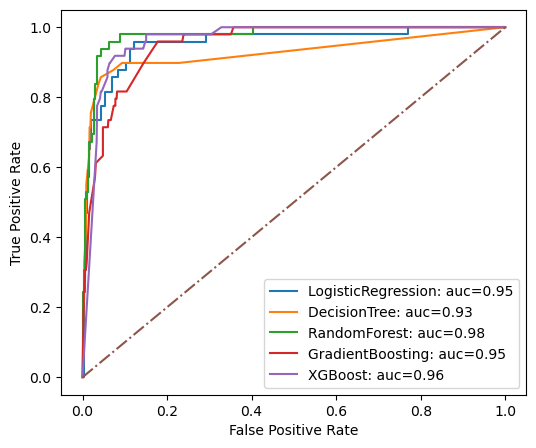

In [72]:
plt.figure(figsize=(6,5))
for i in range(len(roc_df)):
    plt.plot(roc_df.iloc[i].fpr,roc_df.iloc[i].tpr,label='{}: auc={}'.format(roc_df.iloc[i,0],roc_df.iloc[i,3]))
plt.plot([0,1],[0,1],'-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('ROC_AUC.png')

### Adjust threshold for LogisticRegression

C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


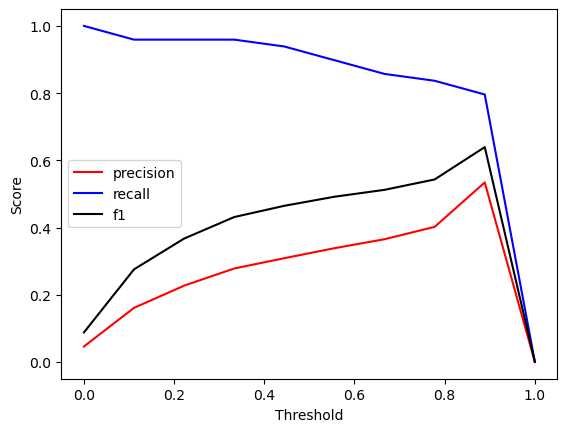

In [73]:
model = LogisticRegression(class_weight = 'balanced',random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred=model.predict(X_test)
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

thresholds = np.linspace(0, 1, 10)
precisions = []
recalls = []
f1s = []
ave = "binary"

for cut in thresholds:
    y_test_predic = (y_test_proba[:, 1] > cut).astype(int)
    precisions.append(precision_score(y_test, y_test_predic, average=ave))
    recalls.append(recall_score(y_test, y_test_predic, average=ave))
    f1s.append(f1_score(y_test, y_test_predic, average=ave))

plt.plot(thresholds, precisions, color="red", label="precision")
plt.plot(thresholds, recalls, color="blue", label="recall")
plt.plot(thresholds, f1s, color="black", label="f1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

### In our case, we prefer precision more than recall, so we manually set the threshold to 0.9, and update the model comparison table.

In [74]:
custom_threshold = 0.9

y_pred_prob_train = model.predict_proba(X_train)[:, 1]
y_pred_prob_test = model.predict_proba(X_test)[:, 1]


# Convert probabilities to binary predictions based on the custom threshold
y_pred_custom_train = (y_pred_prob_train >= custom_threshold).astype(int)
y_pred_custom_test = (y_pred_prob_test >= custom_threshold).astype(int)

accuracy_train = accuracy_score(y_train, y_pred_custom_train)
precision_train = precision_score(y_train, y_pred_custom_train)
recall_train = recall_score(y_train, y_pred_custom_train)
f1_train = f1_score(y_train, y_pred_custom_train)
roc_auc_train = roc_auc_score(y_train, y_pred_custom_train)


print(f"Accuracy_train: {accuracy_train:.3f}")
print(f"Precision_train: {precision_train:.3f}")
print(f"Recall_train: {recall_train:.3f}")
print(f"F1_train: {f1_train:.3f}")
print(f"roc_auc_train: {roc_auc_train:.3f}")

accuracy_test = accuracy_score(y_test, y_pred_custom_test)
precision_test = precision_score(y_test, y_pred_custom_test)
recall_test = recall_score(y_test, y_pred_custom_test)
f1_test = f1_score(y_test, y_pred_custom_test)
roc_auc_test = roc_auc_score(y_test, y_pred_custom_test)

print(f"Accuracy_test: {accuracy_test:.3f}")
print(f"Precision_test: {precision_test:.3f}")
print(f"Recall_test: {recall_test:.3f}")
print(f"F1_test: {f1_test:.3f}")
print(f"roc_auc_test: {roc_auc_test:.3f}")

Accuracy_train: 0.958
Precision_train: 0.492
Recall_train: 0.734
F1_train: 0.589
roc_auc_train: 0.851
Accuracy_test: 0.959
Precision_test: 0.535
Recall_test: 0.776
F1_test: 0.633
roc_auc_test: 0.872


In [75]:
models_balanced_lg = models_balanced.copy()
models_balanced_lg.loc['LogisticRegression',:]=[round(accuracy_train,3),round(accuracy_test,3),
                                                round(recall_train,3),round(recall_test,3),
                                                round(precision_train,3),round(precision_test,3),
                                                round(f1_train,3),round(f1_test,3),
                                                round(roc_auc_train,3),round(roc_auc_test,3),
                                                'custom_threshold=0.9']

models_balanced_lg

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc,Best_Parameters
LogisticRegression,0.958,0.959,0.734,0.776,0.492,0.535,0.589,0.633,0.851,0.872,custom_threshold=0.9
SVC,0.943,0.939,0.988,0.898,0.414,0.423,0.584,0.575,0.965,0.919,"{'C': 10, 'class_weight': 'balanced', 'kernel': 'poly'}"
DecisionTreeClassifier,0.950,0.945,1.000,0.878,0.449,0.448,0.620,0.593,0.993,0.923,"{'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 8}"
RandomForest,0.973,0.969,0.988,0.898,0.606,0.611,0.752,0.727,0.997,0.985,"{'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 8, 'n_estim..."
GradientBoosting,1.000,0.973,1.000,0.551,1.000,0.794,1.000,0.651,1.000,0.982,"{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}"
XGBoost,1.000,0.977,1.000,0.714,1.000,0.778,1.000,0.745,1.000,0.986,"{'max_depth': 10, 'n_estimators': 100, 'scale_pos_weight': 23.641618497109828}"


### 3.2 Method 2 - Smote-enn

In [116]:
from imblearn.combine import SMOTEENN

df=pd.read_csv(r'./feature_engineering.csv',index_col=0)
features = list(df.columns)
target='Perovskite'
features.remove(target)


X=df[features]
y = df[target]

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm=SMOTEENN()
X_resampled, y_resampled=sm.fit_resample(X_train,y_train)

#### SMOTE is an oversampling technique that generates synthetic samples from the minority class. 
#### After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. SMOTE-ENN is a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. 
#### ENN is an undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.

In [117]:
model_params = {
        'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C':[0.1, 1, 10]
        }
    },
    
        'SVC': {
        'model': SVC(random_state=42),
        'params': {
            'C':[0.1, 1, 10],
            'kernel':['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth':[5, 10, 15],
            'min_samples_leaf':[8, 16, 24]
        }
    },

    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 15],
            'min_samples_leaf': [8, 16, 24],
            'bootstrap': [True]
        }
    },
    
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [5, 10, 15]
        }
    },

    'XGBoost': {
        'model': XGBClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 15]
        }
    }
}

scores=make_scorer(precision_score, greater_is_better=True)

results_tunePara = []
Best_Para = []

for model_name, mp in model_params.items():
    grid_search = GridSearchCV(estimator=mp['model'],param_grid=mp['params'], cv=3, n_jobs=-1, scoring=scores)
    grid_search.fit(X_resampled, y_resampled)
        
    best_model = grid_search.best_estimator_
    results_tunePara = score_summary(model_name,best_model,X_train,y_train,X_test,y_test,results_tunePara)
    Best_Para.append(grid_search.best_params_)

C:\Users\JingyunYe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [118]:
models_SMOTEENN = pd.DataFrame(results_tunePara).set_index('Model')
models_SMOTEENN.index.names = [None]
models_SMOTEENN['Best_Parameters'] = Best_Para
models_SMOTEENN

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc,Best_Parameters
LogisticRegression,0.908,0.906,0.936,0.939,0.299,0.322,0.453,0.479,0.922,0.922,{'C': 1}
SVC,0.946,0.944,0.988,0.898,0.429,0.444,0.598,0.595,0.966,0.922,"{'C': 10, 'kernel': 'poly'}"
DecisionTree,0.964,0.953,0.936,0.898,0.533,0.494,0.679,0.638,0.951,0.927,"{'max_depth': 15, 'min_samples_leaf': 8}"
RandomForest,0.962,0.954,0.965,0.878,0.519,0.500,0.675,0.637,0.964,0.918,"{'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 8, 'n_estimators': 50}"
GradientBoosting,0.979,0.975,0.994,0.898,0.659,0.667,0.793,0.765,0.986,0.938,"{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}"
XGBoost,0.976,0.967,0.994,0.898,0.625,0.595,0.768,0.715,0.985,0.934,"{'max_depth': 5, 'n_estimators': 50}"


### Tune SMOTEENN

In [80]:
y_train.value_counts()

Perovskite
0    4090
1     173
Name: count, dtype: int64

In [83]:
ratios = [0.6,0.7,0.8,0.9,1,'minority','all','not minority']
# ratio = N_rm/N_M where N_rm is the number of samples in the minority class after resampling 
# and N_M is the number of samples in the majority class.

for ratio in ratios:
    sm=SMOTEENN(sampling_strategy=ratio,random_state=42)
    X_resampled, y_resampled=sm.fit_resample(X_train,y_train)
    print('ratio={}: \n {}, \n class1 in total:{:.2f}%'.format(ratio,y_resampled.value_counts(),
        y_resampled.value_counts()[1]/len(y_resampled)))

ratio=0.6: 
 Perovskite
0    3884
1    2414
Name: count, dtype: int64, 
 class1 in total:0.38%
ratio=0.7: 
 Perovskite
0    3882
1    2837
Name: count, dtype: int64, 
 class1 in total:0.42%
ratio=0.8: 
 Perovskite
0    3883
1    3249
Name: count, dtype: int64, 
 class1 in total:0.46%
ratio=0.9: 
 Perovskite
0    3880
1    3656
Name: count, dtype: int64, 
 class1 in total:0.49%
ratio=1: 
 Perovskite
1    4079
0    3880
Name: count, dtype: int64, 
 class1 in total:0.51%
ratio=minority: 
 Perovskite
1    4079
0    3880
Name: count, dtype: int64, 
 class1 in total:0.51%
ratio=all: 
 Perovskite
1    4079
0    3880
Name: count, dtype: int64, 
 class1 in total:0.51%
ratio=not minority: 
 Perovskite
0    3927
1      65
Name: count, dtype: int64, 
 class1 in total:0.02%


In [85]:
results_tuneSMOTE=[]

for ratio in ratios:
    sm=SMOTEENN(sampling_strategy=ratio,random_state=42)
    X_resampled, y_resampled=sm.fit_resample(X_train,y_train)

    model = XGBClassifier(max_depth=15,n_estimators=10,random_state=42)
    model.fit(X_resampled,y_resampled)

    results_tuneSMOTE = score_summary('XGBoost',model,X_resampled,y_resampled,X_test,y_test,results_tuneSMOTE)

In [86]:
tuneSMOTE= pd.DataFrame(results_tuneSMOTE).drop(columns = 'Model')
tuneSMOTE['Sample_Strategies']=ratios
tuneSMOTE= tuneSMOTE.set_index('Sample_Strategies')
tuneSMOTE

,Train_accuracy,Test_accuracy,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_roc_auc,Test_roc_auc
Sample_Strategies,,,,,,,,,,
0.6,1.000,0.961,0.999,0.857,1.000,0.545,1.000,0.667,1.0,0.979
0.7,1.000,0.961,1.000,0.878,0.999,0.544,0.999,0.672,1.0,0.980
0.8,0.999,0.958,0.999,0.857,0.998,0.525,0.999,0.651,1.0,0.978
0.9,1.000,0.952,1.000,0.837,0.999,0.488,1.000,0.617,1.0,0.976
1,0.999,0.960,1.000,0.898,0.999,0.537,1.000,0.672,1.0,0.978
minority,0.999,0.960,1.000,0.898,0.999,0.537,1.000,0.672,1.0,0.978
all,0.999,0.960,1.000,0.898,0.999,0.537,1.000,0.672,1.0,0.978
not minority,0.999,0.968,0.969,0.388,1.000,0.826,0.984,0.528,1.0,0.936


### Result: Even different resample strategies result in some changes in model performances, the overfitting still large, therefore, we decide not to use SMOTE-ENN as the imbalanced technique in our case.

### 3.3 Summary table of test Precision

In [105]:
models_tunePara['Test_precision']

LogisticRegression        0.750
SVC                       0.708
DecisionTreeClassifier    0.857
RandomForest              1.000
GradientBoosting          0.829
XGBoost                   0.840
Name: Test_precision, dtype: float64

In [107]:
models_balanced['Test_precision']

LogisticRegression        0.331
SVC                       0.423
DecisionTreeClassifier    0.448
RandomForest              0.611
GradientBoosting          0.794
XGBoost                   0.778
Name: Test_precision, dtype: float64

In [121]:
model_summary = pd.DataFrame()
model_summary.index = models_default.index
model_summary['Default Setting'] = models_default['Test_precision']
model_summary['Hyperparameter Tuned'] = models_tunePara['Test_precision']
model_summary['Class Balanced'] = models_balanced['Test_precision']
model_summary['SMOTEENN'] = models_SMOTEENN['Test_precision']
model_summary

,Default Setting,Hyperparameter Tuned,Class Balanced,SMOTEENN
LogisticRegression,0.750,0.750,0.331,0.322
DecisionTree,0.737,0.857,0.448,0.494
RandomForest,0.806,1.000,0.611,0.500
GradientBoosting,0.735,0.829,0.794,0.667
XGBoost,0.824,0.840,0.778,0.595
SVC,0.708,0.708,0.423,0.444


# 4. Feature Importance

### GradientBoosting is the best ML model with class_weight=balance

train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4090
           1       1.00      1.00      1.00       173

    accuracy                           1.00      4263
   macro avg       1.00      1.00      1.00      4263
weighted avg       1.00      1.00      1.00      4263

test
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1017
           1       0.79      0.55      0.65        49

    accuracy                           0.97      1066
   macro avg       0.89      0.77      0.82      1066
weighted avg       0.97      0.97      0.97      1066



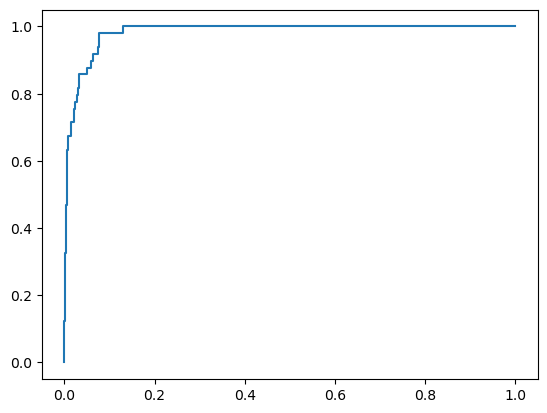

In [137]:
df=pd.read_csv(r'./feature_engineering.csv',index_col=0)
features = list(df.columns)
target='Perovskite'
features.remove(target)


X=df[features]
y = df[target]

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model=GradientBoostingClassifier(learning_rate=0.2, max_depth=10, n_estimators=100, random_state=42)


pos_weight = y_train.value_counts()[0]/y_train.value_counts()[1]
sample_weight = np.array([pos_weight if i == 1 else 1 for i in y_train])

gbr=model.fit(X_train,y_train,sample_weight = sample_weight)

y_train_pred=gbr.predict(X_train)
y_test_pred=gbr.predict(X_test)

print('train')
print(classification_report(y_train,y_train_pred))
print('test')
print(classification_report(y_test,y_test_pred))

fpr, tpr, thresholds = roc_curve(y_test, (gbr.predict_proba(X_test)[:, 1]),pos_label=1)
plt.plot(fpr, tpr,  label = 'Threshold=0.5') 

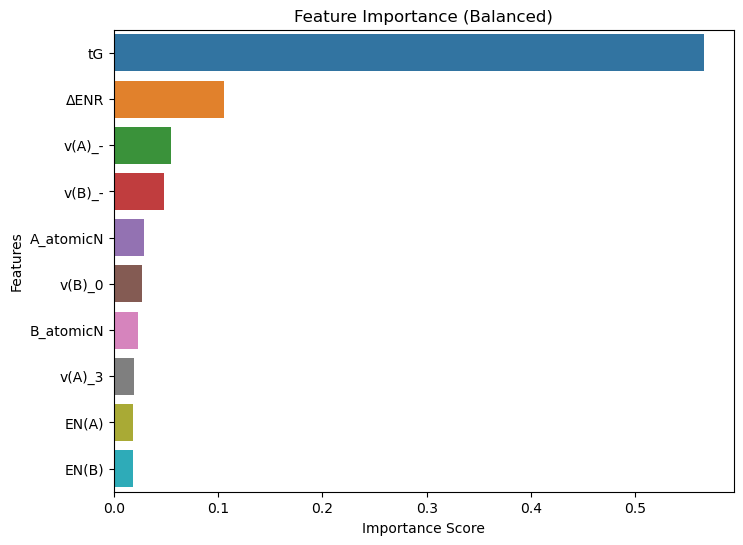

In [152]:
#coef.sort_values(by=[0],ascending=True).plot(kind='barh', figsize=(4,12))
coef=pd.DataFrame(gbr.feature_importances_, index=gbr.feature_names_in_.tolist(),columns=['Feature Importance'])
feature_importance_gbr = coef.sort_values(by='Feature Importance', ascending=False)[:10]

plt.figure(figsize=(8, 6))
sns.barplot(x='Feature Importance', y=feature_importance_gbr.index, data=feature_importance_gbr)
plt.title('Feature Importance (Balanced)')
plt.xlabel('Importance Score')
plt.ylabel('Features')

plt.savefig('rf_feature.png')

In [140]:
coef[0].abs().sort_values(ascending=False).head(5)

tG           0.566154
ΔENR         0.105587
v(A)_-       0.054632
v(B)_-       0.048085
A_atomicN    0.028417
Name: 0, dtype: float64

# SHAP

In [141]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [143]:
explainer = shap.TreeExplainer(gbr)
Train=pd.concat([X_train,y_train],axis=1)
Test=pd.concat([X_test,y_test],axis=1)
shap_values = explainer.shap_values(X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


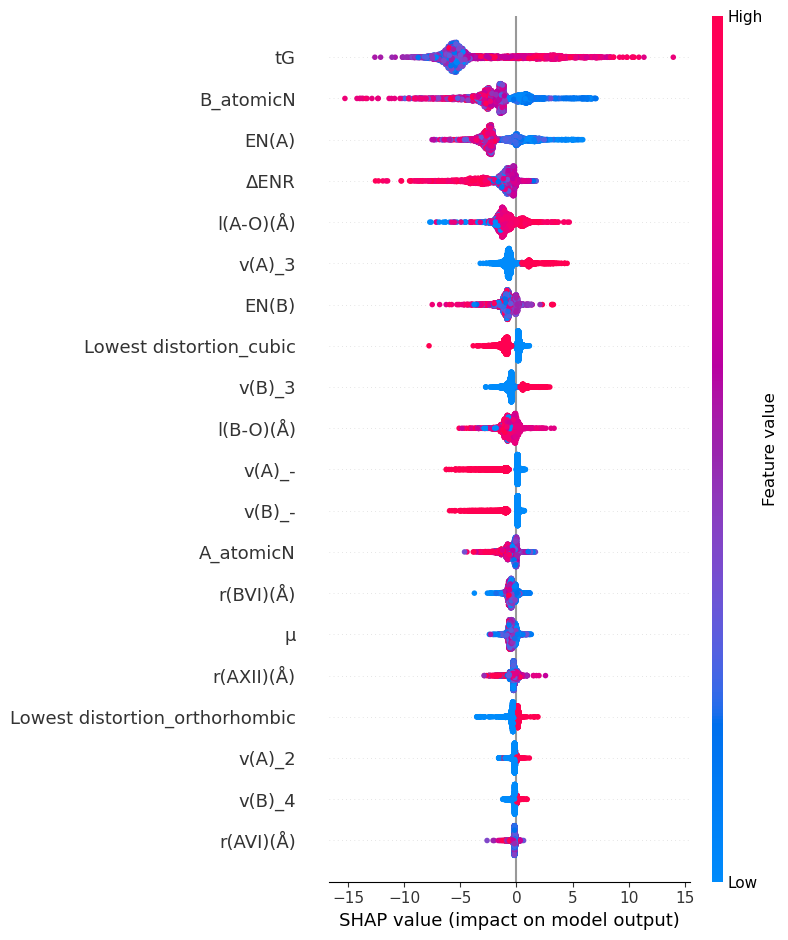

In [144]:
shap.summary_plot(shap_values, X_train)